#### 행정구역 정보 읽고, 분석하기
1. read_csv() 함수로 csv file 읽기
2. loc 과 iloc를 사용해서 특정행과 열을 선택하기
3. 컬럼명 변경하기
4. 상관관계 분석 (인구수와 면적간의 상관관계)
5. 시각화

In [1]:
import pandas as pd

print(pd.__version__)

1.2.4


In [2]:
data = pd.read_csv('data/data_draw_korea.csv')
print(type(data))
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(229, 8)


In [3]:
data.head(3)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시


In [4]:
data.tail()

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
224,224,127462,제천,8,10,882.47,충청북도,제천시
225,225,34480,증평,6,11,81.84,충청북도,증평군
226,226,62809,진천,5,11,406.08,충청북도,진천군
227,227,790216,청주,6,12,932.51,충청북도,청주시
228,228,198077,충주,6,10,983.70,충청북도,충주시


In [5]:
data.sample(5)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
47,47,150061,하남,9,5,93.10,경기도,하남시
223,223,86441,음성,5,10,521.05,충청북도,음성군
53,53,41388,남해,6,19,357.00,경상남도,남해군
19,19,955384,고양,4,2,267.33,경기도,고양시
139,139,279939,서울성동,7,5,16.85,서울특별시,성동구


In [6]:
print(f'컬럼명 : {data.columns}')
print(f'인덱스 : {data.index}')

컬럼명 : Index(['Unnamed: 0', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')
인덱스 : RangeIndex(start=0, stop=229, step=1)


In [7]:
print(type(data.values))
data.values

<class 'numpy.ndarray'>


array([[0, 202520, '강릉', ..., 1040.07, '강원도', '강릉시'],
       [1, 25589, '고성(강원)', ..., 664.19, '강원도', '고성군'],
       [2, 86747, '동해', ..., 180.01, '강원도', '동해시'],
       ...,
       [226, 62809, '진천', ..., 406.08, '충청북도', '진천군'],
       [227, 790216, '청주', ..., 932.51, '충청북도', '청주시'],
       [228, 198077, '충주', ..., 983.7, '충청북도', '충주시']], dtype=object)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  229 non-null    int64  
 1   인구수         229 non-null    int64  
 2   shortName   229 non-null    object 
 3   x           229 non-null    int64  
 4   y           229 non-null    int64  
 5   면적          229 non-null    float64
 6   광역시도        229 non-null    object 
 7   행정구역        229 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 14.4+ KB


In [9]:
# 인구수 컬럼의 타입 확인
data['인구수'].dtypes

dtype('int64')

In [10]:
# describe() 함수
data.describe()

,Unnamed: 0,인구수,x,y,면적
count,229.000000,2.290000e+02,229.000000,229.000000,229.000000
mean,114.000000,2.110898e+05,6.117904,11.262009,435.419795
std,66.250786,2.074378e+05,3.320469,6.040898,381.612549
min,0.000000,8.392000e+03,0.000000,0.000000,2.800000
25%,57.000000,4.955900e+04,3.000000,6.000000,54.000000
50%,114.000000,1.401590e+05,6.000000,11.000000,436.400000
75%,171.000000,3.216180e+05,9.000000,16.000000,692.800000
max,228.000000,1.125461e+06,13.000000,25.000000,1817.940000


In [11]:
# 인구수 1개의 컬럼 선택
print(type(data['인구수']))
data['인구수']

<class 'pandas.core.series.Series'>


0      202520
1       25589
2       86747
3       63986
4       76733
        ...  
224    127462
225     34480
226     62809
227    790216
228    198077
Name: 인구수, Length: 229, dtype: int64

In [12]:
# 인구수 컬럼의 집계함수
print(f"인구수 최대값 {data['인구수'].max()}")
print(f"인구수 최소값 {data['인구수'].min()}")
print(f"인구수 평균 {data['인구수'].mean()}")
print(f"인구수 표준편차 {data['인구수'].std()}")
print(f"인구수 중간값 {data['인구수'].median()}")
data['인구수'].quantile([0.25, 0.75])

인구수 최대값 1125461
인구수 최소값 8392
인구수 평균 211089.77729257641
인구수 표준편차 207437.8370475227
인구수 중간값 140159.0


0.25     49559.0
0.75    321618.0
Name: 인구수, dtype: float64

In [13]:
# unique한 광역시도명
data['광역시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [14]:
# 광역시도 row counting
data['광역시도'].value_counts()

경기도        31
서울특별시      25
경상북도       23
전라남도       22
강원도        18
경상남도       18
부산광역시      16
충청남도       15
전라북도       14
충청북도       11
인천광역시      10
대구광역시       8
대전광역시       5
광주광역시       5
울산광역시       5
제주특별자치도     2
세종특별자치시     1
Name: 광역시도, dtype: int64

In [24]:
#경기도 만 선택
# df.loc[행선택 , 열선택]
# 인구수가 많은 순서대로 정렬
gy_df = data.loc[data['광역시도'] == '경기도','인구수':'행정구역'].sort_values(by='인구수', ascending=False)\
.reset_index(drop=True)
print(type(gy_df))
gy_df

<class 'pandas.core.frame.DataFrame'>


,인구수,shortName,x,y,면적,광역시도,행정구역
0,1125461,수원,6,9,121.090,경기도,수원시
1,955384,고양,4,2,267.330,경기도,고양시
2,915005,용인,7,9,591.500,경기도,용인시
3,911628,성남,7,8,141.820,경기도,성남시
4,805473,부천,2,4,53.440,경기도,부천시
5,668089,안산,3,6,144.780,경기도,안산시
6,610300,남양주,8,3,458.440,경기도,남양주시
7,566558,안양,3,4,58.520,경기도,안양시
8,555129,화성,3,7,688.100,경기도,화성시
9,423763,평택,5,9,452.310,경기도,평택시


In [27]:
#경기도 인구수의 평균과 표준편차
print(f"경기도 인구수 평균 = {gy_df['인구수'].mean()}")
print(f"경기도 인구수 편차 = {gy_df['인구수'].std()}")

경기도 인구수 평균 = 378845.48387096776
경기도 인구수 편차 = 304548.39514203876


In [28]:
def pop_mean_std(sido_name):
    sido_df = data.loc[data['광역시도'] == sido_name,'인구수':'행정구역'].sort_values(by='인구수', ascending=False).reset_index(drop=True)
    print(f"{sido_name} 인구수 평균 = {sido_df['인구수'].mean()}")
    print(f"{sido_name} 인구수 편차 = {sido_df['인구수'].std()}")

In [29]:
pop_mean_std('서울특별시')

서울특별시 인구수 평균 = 375792.28
서울특별시 인구수 편차 = 125231.24797500289


#### Row, Column Selection
* loc[ ] 과 iloc[ ] 사용하기

In [30]:
#loc[] 사용
#인덱스가 20 부터 25까지
data.loc[20:25]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
20,20,63227,과천,7,7,35.813,경기도,과천시
21,21,327111,광명,3,3,38.500,경기도,광명시
22,22,290210,광주,8,7,431.840,경기도,광주시
23,23,175676,구리,9,4,33.300,경기도,구리시
24,24,273302,군포,5,8,36.350,경기도,군포시
25,25,326523,김포,2,3,276.640,경기도,김포시


In [31]:
#iloc[] 사용
#인덱스가 20 부터 25까지
data.iloc[20:25]

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
20,20,63227,과천,7,7,35.813,경기도,과천시
21,21,327111,광명,3,3,38.500,경기도,광명시
22,22,290210,광주,8,7,431.840,경기도,광주시
23,23,175676,구리,9,4,33.300,경기도,구리시
24,24,273302,군포,5,8,36.350,경기도,군포시


In [32]:
ㅊ
#인덱스가 20 부터 22까지 컬럼이 인구수부터 광역시도 까지
data.loc[20:25, '인구수':'광역시도']

,인구수,shortName,x,y,면적,광역시도
20,63227,과천,7,7,35.813,경기도
21,327111,광명,3,3,38.500,경기도
22,290210,광주,8,7,431.840,경기도
23,175676,구리,9,4,33.300,경기도
24,273302,군포,5,8,36.350,경기도
25,326523,김포,2,3,276.640,경기도


In [34]:
#iloc[] 사용
#인덱스가 20 부터 25까지 컬럼이 인구수부터 광역시도 까지
data.iloc[20:25,1:7]

,인구수,shortName,x,y,면적,광역시도
20,63227,과천,7,7,35.813,경기도
21,327111,광명,3,3,38.500,경기도
22,290210,광주,8,7,431.840,경기도
23,175676,구리,9,4,33.300,경기도
24,273302,군포,5,8,36.350,경기도


In [35]:
#loc[] 사용
#index가 40,55,60 이고, column이 인구수,광역시도,행정구역
data.loc[[40,55,60],['인구수','광역시도','행정구역']]

,인구수,광역시도,행정구역
40,915005,경기도,용인시
55,106388,경상남도,사천시
60,56734,경상남도,창녕군


In [41]:
#인구수가 전국평균 보다 작은 지역(인구수,행정구역,광역시도)을 선택해서 결과를 엑셀파일로 저장하기
pop_mean_value=data['인구수'].mean()
print(pop_mean_value)
print(round(pop_mean_value))
print(f'{pop_mean_value:.2f}')
pop_mean_lt_df = data.loc[data['인구수'] < pop_mean_value,['광역시도','행정구역','인구수']].sort_values(by='인구수',ascending=False)\
.reset_index(drop=True)
#excel 파일로 저장
pop_mean_lt_df.to_excel('data/평균인구수미만지역.xlsx')

211089.77729257641
211090
211089.78


In [42]:
# 컬럼명 변경
data.columns

Index(['Unnamed: 0', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')

In [46]:
# inplace=False 디폴트 설정 변경한 결과를 출력은 하지만 원본객체를 변경하지는 않는다.
# inplace=True 원본객체를 변경하고 출력은 하지 않는다. 
data.rename(columns={'Unnamed: 0':'seq'}, inplace=True)

In [48]:
print(data.columns)
data.head(3)

Index(['seq', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')


,seq,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시


In [52]:
#seq 컬럼을 index로 바꾸기
data.set_index('seq', inplace=True)

In [53]:
data.head(2)

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군


#### 상관계수 (Correlation Coefficient)
* 인구수와 면적 데이터간에 관련성이 있는지 보기 위해서 상관계수 구하기
* 상관계수 값은 -1 ~ 1 사이의 값이며, 0에 가까울 수록 관련성이 낮고, 1에 가까울 수록 관련성이 높다. 
* 음수는 반비례 (면적이 넓은 반면 인구수는 적은 경우), 양수 비례 (면적이 넓고, 인구수도 높은 경우)
* corr() 함수

In [55]:
#전국의 면적과 인구수의 상관계수 구하기
data['면적'].corr(data['인구수'])

-0.3460351605045768

In [58]:
#서울의 면적과 인구수의 상관계수 구하기
seoul_df = data.loc[data['광역시도'] == '서울특별시']
seoul_df['면적'].corr(seoul_df['인구수'])

0.6644268188909778

In [59]:
#경기도의 면적과 인구수의 상관계수 구하기
gy_df['면적'].corr(gy_df['인구수'])

-0.21572485071590813

In [63]:
#인덱스가 0인 행 하나만 선택
print(type(data.loc[0]))
data.loc[0]

<class 'pandas.core.series.Series'>


인구수           202520
shortName         강릉
x                 11
y                  4
면적           1040.07
광역시도             강원도
행정구역             강릉시
Name: 0, dtype: object

In [64]:
#열 하나만 선택
print(type(data['면적']))
data['면적']

<class 'pandas.core.series.Series'>


seq
0      1040.07
1       664.19
2       180.01
3      1185.80
4       105.25
        ...   
224     882.47
225      81.84
226     406.08
227     932.51
228     983.70
Name: 면적, Length: 229, dtype: float64

### GroupBy 기능 사용하기
* 광역시도별 인구수의 합계
* ~별에 해당하는 컬럼명이나 컬럼값을 groupby() 함수의 인자로 전달한다. 
* Series 객체의 groupby() 함수는 컬럼의 값을 인자로 전달하고, DataFrame 객체의 groupby() 함수는 컬럼명을 인자로 전달합니다. 

In [68]:
# Series 객체 사용 - 광역시도별 인구수의 합계 
# SeriesGroupBy object
data['인구수'].groupby(data['광역시도']).sum().sort_values(ascending=False)

광역시도
경기도        11744210
서울특별시       9394807
부산광역시       3323591
경상남도        3144487
인천광역시       2766575
경상북도        2508964
대구광역시       2378450
충청남도        1946129
전라북도        1739048
전라남도        1700563
충청북도        1484720
대전광역시       1467677
광주광역시       1438209
강원도         1429438
울산광역시       1105585
제주특별자치도      575873
세종특별자치시      191233
Name: 인구수, dtype: int64

In [70]:
# DataFrame 객체 사용 - 광역시도별 인구수의 합계 
# DataFrameGroupBy object
data.groupby('광역시도').sum()

,인구수,x,y,면적
광역시도,,,,
강원도,1429438,173,68,16874.810
경기도,11744210,182,162,10179.743
경상남도,3144487,123,313,10437.460
경상북도,2508964,229,240,19021.850
광주광역시,1438209,12,99,501.280
대구광역시,2378450,74,111,885.690
대전광역시,1467677,23,66,539.640
부산광역시,3323591,162,276,763.240
서울특별시,9394807,142,111,605.390


In [72]:
data.groupby('광역시도')['인구수'].sum()

광역시도
강원도         1429438
경기도        11744210
경상남도        3144487
경상북도        2508964
광주광역시       1438209
대구광역시       2378450
대전광역시       1467677
부산광역시       3323591
서울특별시       9394807
세종특별자치시      191233
울산광역시       1105585
인천광역시       2766575
전라남도        1700563
전라북도        1739048
제주특별자치도      575873
충청남도        1946129
충청북도        1484720
Name: 인구수, dtype: int64

In [75]:
#광역시도별, 행정구역별 인구수의 합계
groupby_df = data.groupby(['광역시도','행정구역'])['인구수'].sum()
groupby_df.to_excel('data/광역시도별행정구역별인구수의합계.xlsx', sheet_name='인구수')

#### 엑셀 수치데이터에 콤마찍기

In [77]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('data/광역시도별인구수의합계1.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
groupby_df.to_excel(writer, sheet_name='인구수합계')

# Get the xlsxwriter workbook and worksheet objects.
workbook  = writer.book
worksheet = writer.sheets['인구수합계']

# Set a currency number format for a column.
num_format = workbook.add_format({'num_format': '#,###'})
worksheet.set_column('C:C', None, num_format)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [81]:
# agg() 함수 사용 - 그룹핑한 데이터를 여러개의 집계함수를 사용해서 새로운 DataFrame 객체 생성하기
group_agg_df = data.groupby('광역시도')['인구수'].agg(['max','mean','std']).fillna(0).sort_values(by='std',ascending=False)

In [83]:
# DataFrame 객체의 style 설정
group_agg_df.style.format('{0:.2f}')

,max,mean,std
광역시도,,,
경기도,1125461.00,378845.48,304548.40
경상남도,1010040.00,174693.72,245796.47
충청북도,790216.00,134974.55,223460.36
제주특별자치도,430504.00,287936.50,201620.89
인천광역시,527153.00,276657.50,199353.60
대구광역시,584517.00,297306.25,174375.39
전라북도,630708.00,124217.71,168327.13
충청남도,584912.00,129741.93,141125.11
광주광역시,439683.00,287641.80,137076.68


#### 시각화
* %matplotlib inline 설정 (jupyter 에서는 show() 함수를 호출하지 않아도 plot이 출력된다)
* 한글폰트 설정이 필요함
* Plot에 대한 설정은 matplotlib의 함수를 사용하고, Plot을 그려주는 기능은 seaborn()의 함수를 사용합니다. 

In [84]:
%matplotlib inline

In [86]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

print('matplotlib ', matplotlib.__version__)
print('seaborn ', sns.__version__)

matplotlib  3.3.4
seaborn  0.11.1


In [89]:
# 폰트이름과 폰트파일 정보 출력 
[ (font.name, font.fname) for font in fm.fontManager.ttflist if 'Ma' in font.name]

[('Matura MT Script Capitals', 'C:\\Windows\\Fonts\\MATURASC.TTF'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgun.ttf'),
 ('Maiandra GD', 'C:\\windows\\Fonts\\MAIAN.TTF'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunbd.ttf'),
 ('Malgun Gothic', 'C:\\windows\\Fonts\\malgun.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunsl.ttf'),
 ('Malgun Gothic', 'C:\\windows\\Fonts\\malgunsl.ttf'),
 ('Marlett', 'C:\\windows\\Fonts\\marlett.ttf'),
 ('Maiandra GD', 'C:\\Windows\\Fonts\\MAIAN.TTF'),
 ('Magic R', 'C:\\windows\\Fonts\\HMKMMAG.TTF'),
 ('Matura MT Script Capitals', 'C:\\windows\\Fonts\\MATURASC.TTF'),
 ('Magic R', 'C:\\Windows\\Fonts\\HMKMMAG.TTF'),
 ('Magneto', 'C:\\Windows\\Fonts\\MAGNETOB.TTF'),
 ('Malgun Gothic', 'C:\\windows\\Fonts\\malgunbd.ttf'),
 ('Magneto', 'C:\\windows\\Fonts\\MAGNETOB.TTF')]

In [91]:
# font name을 알고 있다면 생략가능
#한글폰트 path 설정
font_path = 'C:\\windows\\Fonts\\malgun.ttf'
#font의 파일정보로 font name 을 알아내기
font_prop = fm.FontProperties(fname=font_path).get_name()

# matplotlib의 rc(run command) 함수를 사용해서 font name 설정
matplotlib.rc('font', family=font_prop)

#### Figure, Axes, Plot 
* Axes는 Plot이 실제 그려지는 공간
* Figure는 Axes 보다 더 상위의 공간
  : Figure을 여러개의 Axes로 분할할 수 있다.
* seaborn의 barplot() 함수(막대그래프) 사용  

In [92]:
seoul_df.head(3)

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
124,526157,서울강남,6,7,39.5,서울특별시,강남구
125,432028,서울강동,8,5,24.6,서울특별시,강동구
126,310292,서울강북,5,2,23.6,서울특별시,강북구


Figure(1296x864)
AxesSubplot(0.125,0.536818;0.775x0.343182)
AxesSubplot(0.125,0.125;0.775x0.343182)


<AxesSubplot:xlabel='행정구역', ylabel='면적'>

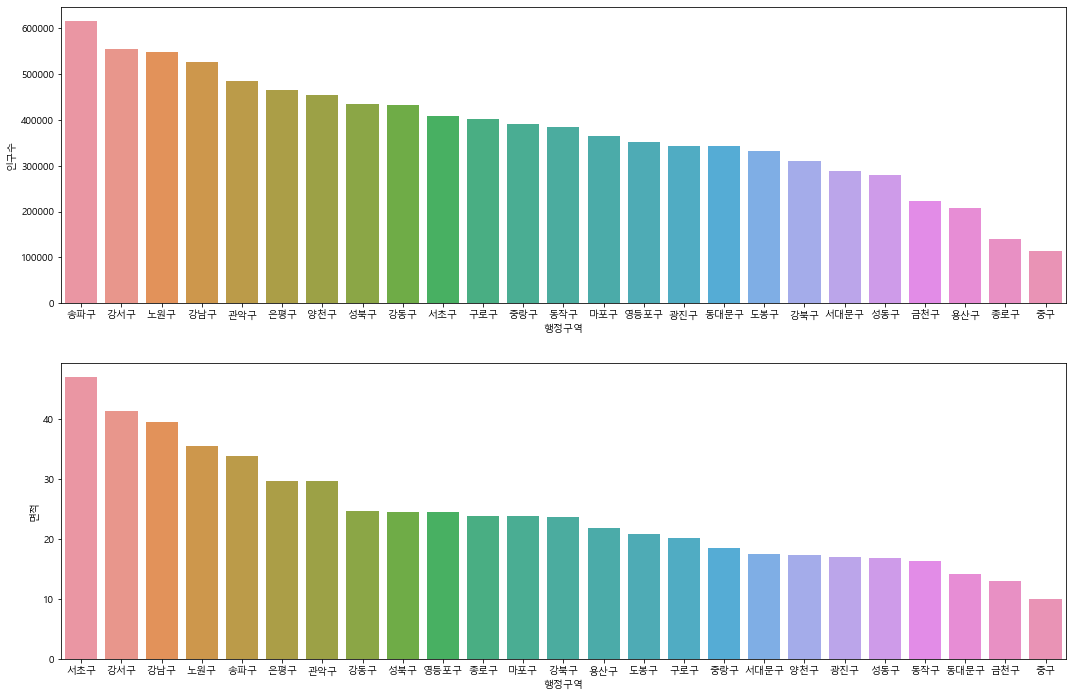

In [99]:
figure, (axes1,axes2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18,12)
print(figure)
print(axes1)
print(axes2)
sns.barplot(x='행정구역', y='인구수', data=seoul_df.sort_values(by='인구수',ascending=False), ax=axes1)
sns.barplot(x='행정구역', y='면적', data=seoul_df.sort_values(by='면적',ascending=False), ax=axes2)

In [ ]:
# 광역시도 이름을 인자로 받아서 인구수와 면적을 그려주는 함수
def show_pop_area(sido_name):
    sido_df = data.loc[data['광역시도'] == sido_name]
    figure, (axes1,axes2) = plt.subplots(nrows=2, ncols=1)
    figure.set_size_inches(18,12)
    sns.barplot(x='행정구역', y='인구수', data=sido_df.sort_values(by='인구수',ascending=False), ax=axes1)
    sns.barplot(x='행정구역', y='면적', data=sido_df.sort_values(by='면적',ascending=False), ax=axes2)